In [1]:
import pandas
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [2]:
#read csv file
df = pandas.read_csv('data/pacientes.csv', header=None)
#table dimensions
col_count = df.shape[1]
#add column names
for i in range(col_count-1):
    df.rename(columns={i: 'X'+str(i)}, inplace=True)
df.rename(columns={col_count-1: 'Class'}, inplace=True)

#label encoder for class column if its more than 3 columns

#le = LabelEncoder()
#df['Class_Enc'] = le.fit_transform(df['Class'])

#Get the first 2 columns
#df_2d = df[['X0', 'X1']]
#scaler= StandardScaler()

#scaler.fit(df_2d)

#data = scaler.transform(df_2d)

#Remplace the first 2 columns with the scaled data
#df = df.drop(['X0', 'X1'], axis=1)
#df['X0'] = data[:, 0]
#df['X1'] = data[:, 1]

#move the class column to the end
#df = df[['X0', 'X1', 'Class']]

#df = df.drop(['Class_Enc'], axis=1)
#save_path = 'data/creditos_scaled.csv'
#df.to_csv(save_path, index=False)
df

,X0,X1,Class
0,57,126,1
1,44,141,1
2,49,149,0
3,71,149,1
4,41,157,1
...,...,...,...
295,62,394,1
296,63,407,0
297,56,409,0
298,65,417,1


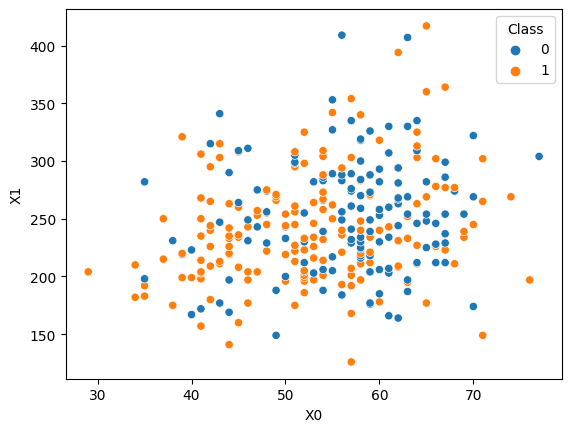

In [3]:
#plot data using last column as color group
if col_count == 3:
    sns.scatterplot(x='X0', y='X1', hue='Class', data=df)
elif col_count == 4:
    #plot scatterplot in 3d
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['X0'], df['X1'], df['X2'], c=df['Class'], marker='o')
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    ax.set_zlabel('X2')
    plt.show()
else:
    print('Cannot plot data with more than 3 dimensions')
    

    

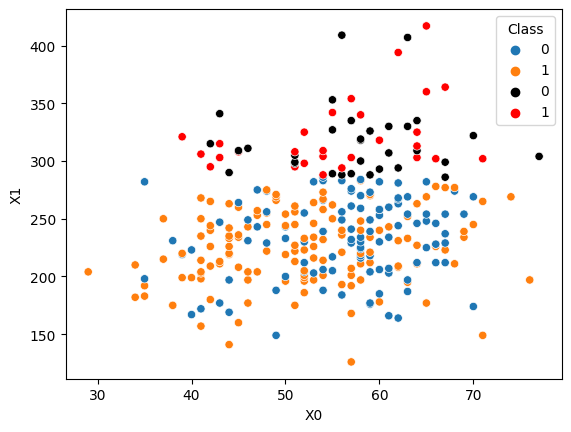

In [4]:
#Take 80% for training and 20% for testing
#train = df.sample(frac=0.8, random_state=200)
#test = df.drop(train.index)
# tomar el 80% de los datos para entrenamiento sin aleatoriedad
train = df.loc[:int(df.shape[0]*0.8)-1, :].copy()
# tomar el 20% de los datos para prueba sin aleatoriedad
test = df.loc[int(df.shape[0]*0.8):, :].copy()

# actualizar los valores del DataFrame original usando .loc[]
train.loc[:, :] = df.loc[:int(df.shape[0]*0.8), :]
test.loc[:, :] = df.loc[int(df.shape[0]*0.8):, :]
#

#plot training data
if col_count == 3:
    sns.scatterplot(x='X0', y='X1', hue='Class', data=train)
    #plot testing data with different color
    sns.scatterplot(x='X0', y='X1', hue='Class', data=test, palette=['black', 'red'])





In [5]:
train

,X0,X1,Class
0,57,126,1
1,44,141,1
2,49,149,0
3,71,149,1
4,41,157,1
...,...,...,...
235,54,283,0
236,56,283,0
237,58,283,1
238,58,284,0


In [6]:
#test
test

,X0,X1,Class
240,67,286,0
241,54,288,1
242,56,288,0
243,59,288,0
244,55,289,0
245,57,289,0
246,44,290,0
247,60,293,0
248,56,294,1
249,62,294,0


In [7]:
# n dimensional eclidian distance
def distance(x, y):
    return sum([(x[i]-y[i])**2 for i in range(len(x))])**0.5


In [8]:
# distance between n dimensional points
testa = [1.5, 1.5]
# calculate distance between test point and all points in dataframe
#df['Distance'] = df.apply(lambda row: distance(row[:-2], testa), axis=1)

In [9]:
# sort by distance
#df.sort_values(by=['Distance'])

In [10]:
# get k nearest neighbors
def knn(df_test, df_train, k):
    #for each row in test dataframe
    for index, row in df_test.iterrows():
        #calculate distance between test point and all points in dataframe
        #print('Test point: ', row[:-1])
        df_train['Distance'] = df_train.apply(lambda rowT: distance(rowT[:-1], row[:-1]), axis=1)

        #sort by distance
        df_train.sort_values(by=['Distance'], inplace=True)
        #print('Train points: ')
        #print(df_train)
        #get k nearest neighbors
        neighbors = df_train.head(k)
        #get most common class
        #print('Class: ')
        classi = neighbors['Class'].value_counts().idxmax()
        #print(classi)

        #add class_pred column to test dataframe
        df_test.loc[index, 'Class_pred'] = str(classi)

        #drop distance column
        df_train.drop(columns=['Distance'], inplace=True)
        
    return df_test


prueba = pandas.DataFrame([[5, 4, 0]], columns=['X0', 'X1', 'Class'])

#df_2d = prueba[['X0', 'X1']]
#scaler= StandardScaler()

#scaler.fit(df_2d)

##data = scaler.transform(df_2d)
#print(data)
#Remplace the first 2 columns with the scaled data
#prueba = prueba.drop(['X0', 'X1'], axis=1)
#prueba['X0'] = data[:, 0]
#prueba['X1'] = data[:, 1]

#move the class column to the end
#prueba = prueba[['X0', 'X1', 'Class']]


x_test=knn(test, train, 95)

    

In [11]:
x_test

,X0,X1,Class,Class_pred
240,67,286,0,0
241,54,288,1,0
242,56,288,0,0
243,59,288,0,0
244,55,289,0,0
245,57,289,0,0
246,44,290,0,0
247,60,293,0,0
248,56,294,1,0
249,62,294,0,0


In [12]:
#calculate accuracy
def accuracy(df):
    #set class_pred to string
    df['Class_pred'] = df['Class_pred'].astype(str)
    #set class to string
    df['Class'] = df['Class'].astype(str)
    print(f"Accuracy: {sum(df['Class'] == df['Class_pred'])}/{len(df)}")
    return sum(df['Class'] == df['Class_pred'])/len(df)


In [13]:
#find best k
def best_k(df_test, df_train):
    #for each k from 1 to 10
    for k in range(1, 99):
        #get predictions
        df_test = knn(df_test, df_train, k)
        #calculate accuracy
        acc = accuracy(df_test)
        print('k: ', k, 'accuracy: ', acc)

In [14]:
best_k(test, train)

Accuracy: 32/60
k:  1 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  2 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  3 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  4 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  5 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  6 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  7 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  8 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  9 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  10 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  11 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  12 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  13 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  14 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  15 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  16 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  17 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  18 accuracy:  0.5333333333333333
Accuracy: 32/60
k:  19 accuracy:  0.5333333333333333
Ac